In [9]:
import scanpy as sc
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import warnings
from pathlib import Path

In [10]:
import matplotlib
from matplotlib import rc
import matplotlib.pyplot as plt 
matplotlib.rcdefaults()

matplotlib_rc = { 
    # 'text': {'usetex': True}, 
    'font': {'family': 'serif'} } # Apply changes for k, v in matplotlib_rc.items(): rc(k, **v)
for k, v in matplotlib_rc.items():
          rc(k, **v)

In [11]:
warnings.filterwarnings('ignore')

In [44]:
def plot_sparsity_histograms(adata_generated, adata_real, folder, dataset_name, xlim=None, bins=30):
    """
    Plots histograms of gene expression sparsity for real and generated datasets.
    
    Parameters:
    adata_generated (dict): Dictionary where keys are model names and values are generated anndata objects.
    adata_real (anndata.AnnData): AnnData object of the real dataset.
    """
    save_path = Path(folder)
    # Compute sparsity for the real dataset
    sparsity_real = (adata_real.X.A == 0).sum(1)
    print(sparsity_real.shape)
    sparsity_real_df = {'Number of zeroes per cell': list(sparsity_real),
                                     'Model': ['Real data' for _ in range(len(sparsity_real))]}
    
    # Compute sparsity for each generated dataset
    for model_name, adata in adata_generated.items():
        sparsity_generated = (adata.X.A == 0).sum(1)
        print(sparsity_generated.shape)
        sparsity_real_df['Number of zeroes per cell'] += list(sparsity_generated)
        sparsity_real_df['Model'] += [model_name for _ in range(len(sparsity_generated))]
    
    # Plotting
    plt.figure(figsize=(5, 5))
    hist = sns.histplot(data=sparsity_real_df, x='Number of zeroes per cell', hue='Model', kde=True, alpha=1, 
                palette="colorblind", bins=bins, stat="count", legend=True, line_kws={"linewidth": 2}, fill=True)

    # kde = sns.kdeplot(data=sparsity_real_df, x='Number of zeroes per cell', hue='Dataset', alpha=0.2, 
    #             palette="colorblind", legend=False, fill=True, linewidth=2)
    plt.ylabel("Frequency")
    plt.title(dataset_name)
    if xlim:
        plt.xlim(xlim[0], xlim[1])
    plt.xticks(rotation=45)  
    plt.tight_layout()
    plt.savefig(save_path / (dataset_name+".svg"), format='svg')
    plt.show()

In [45]:
folder = "/home/icb/alessandro.palma/environment/cfgen/figs/sparsity"

## Dentategyrus

In [46]:
adata_celldreamer_dent = sc.read_h5ad("/home/icb/alessandro.palma/environment/cfgen/project_folder/datasets/generated/dentategyrus/generated_cells_0.h5ad")
adata_scDiff_dent = sc.read_h5ad("/home/icb/alessandro.palma/environment/cfgen/project_folder/baseline_experiments/scDiffusion/generated/dentategyrus/generated_cells_0.h5ad")
# adata_ACTIVA_dent = sc.read_h5ad("/home/icb/alessandro.palma/environment/cfgen/project_folder/baseline_experiments/ACTIVA/generated/dentategyrus/generated_cells_0.h5ad")
adata_scgan_dent = sc.read_h5ad("/home/icb/alessandro.palma/environment/cfgen/project_folder/baseline_experiments/scgan/model_runs/dentategyrus/dentategyrus_generated_0.h5ad")
# adata_scvi_dent = sc.read_h5ad("/home/icb/alessandro.palma/environment/cfgen/project_folder/baseline_experiments/scvi/dentategyrus/generated/dentategyrus_0.h5ad")
adata_real_dent = sc.read_h5ad("/home/icb/alessandro.palma/environment/cfgen/project_folder/datasets/processed_full_genome/dentategyrus/dentategyrus_test.h5ad")

In [47]:
adata_scDiff_dent = adata_scDiff_dent[:len(adata_celldreamer_dent)]
adata_scgan_dent = adata_scgan_dent[:len(adata_celldreamer_dent)]
adata_real_dent = adata_real_dent[:len(adata_celldreamer_dent)]

(3600,)
(3600,)
(3600,)
(3600,)


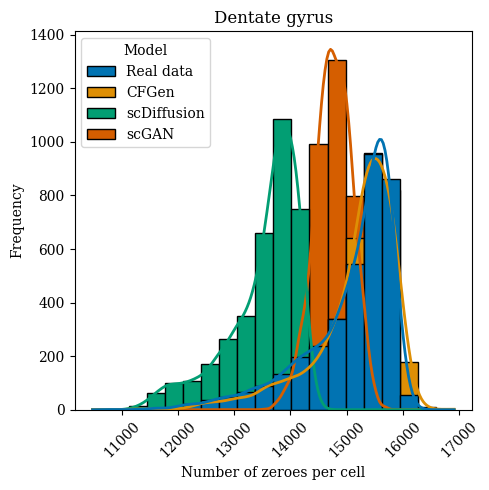

In [48]:
df = plot_sparsity_histograms({"CFGen": adata_celldreamer_dent, "scDiffusion": adata_scDiff_dent, "scGAN":adata_scgan_dent}, 
                        adata_real_dent, folder=folder, dataset_name="Dentate gyrus", bins=20)
df = pd.DataFrame(df)

## C. Elegans

In [9]:
adata_celldreamer_c_elegans = sc.read_h5ad("/home/icb/alessandro.palma/environment/cfgen/project_folder/datasets/generated/c_elegans/generated_cells_0.h5ad")
adata_scDiff_c_elegans = sc.read_h5ad("/home/icb/alessandro.palma/environment/cfgen/project_folder/baseline_experiments/scDiffusion/generated/c_elegans/generated_cells_0.h5ad")
# adata_ACTIVA_c_elegans = sc.read_h5ad("/home/icb/alessandro.palma/environment/cfgen/project_folder/baseline_experiments/ACTIVA/generated/c_elegans/generated_cells_0.h5ad")
adata_scgan_c_elegans = sc.read_h5ad("/home/icb/alessandro.palma/environment/cfgen/project_folder/baseline_experiments/scgan/model_runs/c_elegans/c_elegans_generated_0.h5ad")
# adata_scvi_c_elegans = sc.read_h5ad("/home/icb/alessandro.palma/environment/cfgen/project_folder/baseline_experiments/scvi/c_elegans/generated/c_elegans_0.h5ad")
adata_real_c_elegans = sc.read_h5ad("/home/icb/alessandro.palma/environment/cfgen/project_folder/datasets/processed_full_genome/c_elegans/c_elegans_test.h5ad")

(17941,)
(18000,)
(19636,)
(17934,)


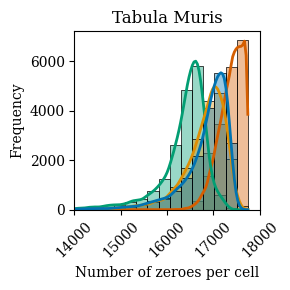

In [10]:
plot_sparsity_histograms({"cellFlow": adata_celldreamer_c_elegans, "scDiffusion": adata_scDiff_c_elegans, "scGAN":adata_scgan_c_elegans}, 
                        adata_real_c_elegans, folder=folder, dataset_name="Tabula Muris", xlim=(14000, 18000))

## PBMC3K

In [11]:
adata_celldreamer_pbmc3k = sc.read_h5ad("/home/icb/alessandro.palma/environment/cfgen/project_folder/datasets/generated/pbmc3k/generated_cells_0.h5ad")
adata_scDiff_pbmc3k = sc.read_h5ad("/home/icb/alessandro.palma/environment/cfgen/project_folder/baseline_experiments/scDiffusion/generated/pbmc3k/generated_cells_0.h5ad")
# adata_ACTIVA_pbmc3k = sc.read_h5ad("/home/icb/alessandro.palma/environment/cfgen/project_folder/baseline_experiments/ACTIVA/generated/pbmc3k/generated_cells_0.h5ad")
adata_scgan_pbmc3k = sc.read_h5ad("/home/icb/alessandro.palma/environment/cfgen/project_folder/baseline_experiments/scgan/model_runs/pbmc3k/pbmc3k_generated_0.h5ad")
# adata_scvi_pbmc3k = sc.read_h5ad("/home/icb/alessandro.palma/environment/cfgen/project_folder/baseline_experiments/scvi/pbmc3k/generated/pbmc3k_0.h5ad")
adata_real_pbmc3k = sc.read_h5ad("/home/icb/alessandro.palma/environment/cfgen/project_folder/datasets/processed_full_genome/pbmc3k/pbmc3k_test.h5ad")

(528,)
(528,)
(528,)
(527,)


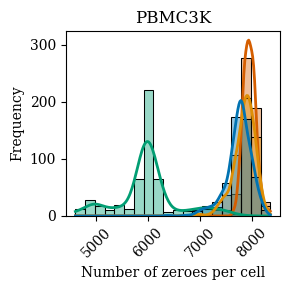

In [12]:
plot_sparsity_histograms({"cellFlow": adata_celldreamer_pbmc3k, "scDiffusion": adata_scDiff_pbmc3k, "scGAN":adata_scgan_pbmc3k}, 
                        adata_real_pbmc3k, folder=folder, dataset_name="PBMC3K", bins=20)

## HLCA CORE

In [13]:
adata_celldreamer_hlca = sc.read_h5ad("/home/icb/alessandro.palma/environment/cfgen/project_folder/datasets/generated/hlca_core/generated_cells_0.h5ad")
adata_scDiff_hlca = sc.read_h5ad("/home/icb/alessandro.palma/environment/cfgen/project_folder/baseline_experiments/scDiffusion/generated/hlca_core/generated_cells_0.h5ad")
# adata_ACTIVA_pbmc3k = sc.read_h5ad("/home/icb/alessandro.palma/environment/celldreamer/project_folder/baseline_experiments/ACTIVA/generated/pbmc3k/generated_cells_0.h5ad")
adata_scgan_hlca = sc.read_h5ad("/home/icb/alessandro.palma/environment/cfgen/project_folder/baseline_experiments/scgan/model_runs/hlca_core/hlca_core_generated_0.h5ad")
# adata_scvi_pbmc3k = sc.read_h5ad("/home/icb/alessandro.palma/environment/celldreamer/project_folder/baseline_experiments/scvi/pbmc3k/generated/pbmc3k_0.h5ad")
adata_real_hlca = sc.read_h5ad("/home/icb/alessandro.palma/environment/cfgen/project_folder/datasets/processed_full_genome/hlca_core/hlca_core_test.h5ad")

In [14]:
# adata_celldreamer_hlca.var = adata_real_hlca.var.copy()
# adata_scDiff_hlca.var = adata_real_hlca.var.copy()

In [15]:
# sc.pp.highly_variable_genes(adata_real_hlca, n_top_genes=15000, subset=True)

In [16]:
# adata_scDiff_hlca = adata_scDiff_hlca[:, adata_real_hlca.var.index]
# adata_celldreamer_hlca = adata_celldreamer_hlca[:, adata_real_hlca.var.index]

(116989,)
(116000,)
(129211,)
(116989,)


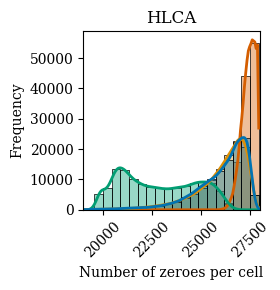

In [17]:
plot_sparsity_histograms({"cellFlow": adata_celldreamer_hlca, "scDiffusion": adata_scDiff_hlca, "scGAN":adata_scgan_hlca}, 
                        adata_real_hlca, folder=folder, dataset_name="HLCA", xlim=(19000, 28000))

In [69]:
adata_scgan_hlca.X.A.max(1)

array([7.6991177, 6.408799 , 5.6371956, ..., 5.858865 , 5.1471553,
       6.0233564], dtype=float32)

In [70]:
adata_celldreamer_hlca.X.A.max(1)

array([6.504846 , 5.9081726, 7.287366 , ..., 6.9256864, 5.411492 ,
       6.404512 ], dtype=float32)

In [71]:
adata_real_hlca.X.A.max(1)

array([3.8965135, 2.9489288, 4.066752 , ..., 3.4283023, 3.260234 ,
       3.5829637], dtype=float32)